# **About Heart Attack**

A heart attack(Cardiovascular diseases) occurs when the flow of blodd to the heart muscle suddenly becomes blocked. From WHO statistics every year 17.9 million dying from heart attack. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/may not getting chance of heart attack.


![](http://mdpremier.com/wp-content/uploads/2019/05/About-Heart-Attack.jpg)

This dataset contain some medical information of patients which tells whether that person getting a heart attack chance is less or more.
* In this notebook, we will build a machine learning model to predict the likelihood of a heart attack using patient data. The goal is to create a reliable prediction system based on features such as age, cholesterol levels, and more.


In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# Load the Data

In [146]:
data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

In [147]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



# Table of Contents:
 
1. Import Libraries
2. EDA
3. Preparing ML models
4. Model evaluation
5. Ensembling
6. Conclusion

# **Import Libraries**

In [150]:
!pip install --upgrade numba

In [151]:
!pip install --upgrade ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 8.2 MB/s eta 0:00:00:00:01
  Attempting uninstall: ydata_profiling
    Found existing installation: ydata-profiling 4.10.0
    Uninstalling ydata-profiling-4.10.0:
      Successfully uninstalled ydata-profiling-4.10.0


In [152]:
!pip install --upgrade ydata_profiling visions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.6 MB/s eta 0:00:0000:01
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5


In [153]:
!pip install numba==0.56.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 37.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 35.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.17 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albume

In [154]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import ydata_profiling as yp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

### Summary of DataFrame

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* **It does not contain Missing values :)**

# **EDA**

In [162]:
yp.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Prepration

In [163]:
X = data.drop('target', axis=1)
y = data['target']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalancing problem**

In [165]:
print(Counter(y))

Counter({1: 526, 0: 499})


In [166]:
print(Counter(y_train))

Counter({1: 423, 0: 397})


In [167]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **ML Models**

Here I take different machine learning algorithms and try to find algorithm which predict accurately.
1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K_Nearest Neighbour
6. Decision Tree
7. Support Vector Machine

### 1. **Logistic Regression**

In [168]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [169]:
y_pred = lr.predict(X_test)

In [170]:
lr_confusion_mat = confusion_matrix(y_test, y_pred)
lr_confusion_mat

array([[73, 29],
       [13, 90]])

In [171]:
lr_acc_score = accuracy_score(y_test, y_pred)
lr_acc_score

0.7951219512195122

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# 2. **Naive Bayes**

In [173]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [174]:
nb_confusion_mat = confusion_matrix(y_test, nb_pred)
print(nb_confusion_mat)

[[72 30]
 [11 92]]


In [175]:
nb_acc_score = accuracy_score(y_test, nb_pred)

In [176]:
print(accuracy_score(y_test, nb_pred)*100)

80.0


In [177]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.75      0.89      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



# **3. Random Forest Classifier**

In [178]:

rf = RandomForestClassifier(n_estimators = 20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [179]:
rf_confusion_mat = confusion_matrix(y_test, rf_pred)
print(rf_confusion_mat)

[[82 20]
 [ 4 99]]


In [180]:
rf_acc_score=accuracy_score(y_test, rf_pred)

In [181]:
print(accuracy_score(y_test, rf_pred))

0.8829268292682927


In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# **4 . Extreme Gradient Boost**

In [183]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators = 25, 
                    max_depth=15, gamma=0.6, subsample =0.52, 
                    colsample_bytree=0.6, seed=27,
                   reg_lambda=2, booster='dart', 
                    colsample_bylevel=0.6, colsample_bynode=0.5)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [184]:
xgb_confusion_mat = confusion_matrix(y_test, xgb_pred)
print(xgb_confusion_mat)

[[84 18]
 [ 8 95]]


In [185]:
xgb_acc_score = accuracy_score(y_test, xgb_pred)

In [186]:
print(accuracy_score(y_test, xgb_pred))

0.8731707317073171


In [187]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       102
           1       0.84      0.92      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



# **5. K-NeighborsClassifier**

In [188]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_confusion_mat = confusion_matrix(y_test, knn_pred)
print(knn_confusion_mat)

[[86 16]
 [17 86]]


In [189]:
knn_acc_score = accuracy_score(y_test, knn_pred)

In [190]:
print(accuracy_score(y_test, knn_pred))

0.8390243902439024


In [191]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.84      0.83      0.84       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



# **6. DecisionTreeClassifier**

In [192]:
dt = DecisionTreeClassifier(criterion ='entropy', random_state=42, max_depth=6)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [193]:
dt_confusion_mat = confusion_matrix(y_test, dt_pred)
print(dt_confusion_mat)

[[81 21]
 [ 5 98]]


In [194]:
dt_acc_score= accuracy_score(y_test, dt_pred)

In [195]:
print(accuracy_score(y_test, dt_pred)*100)

87.3170731707317


In [196]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       102
           1       0.82      0.95      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



# 7. **Support Vector Classifier**

In [197]:
svc = SVC(kernel= 'rbf', C=2)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [198]:
print(confusion_matrix(y_test, svc_pred))

[[91 11]
 [ 5 98]]


In [199]:
svc_acc_score = accuracy_score(svc_pred, y_test)

In [200]:
print(accuracy_score(svc_pred, y_test))

0.9219512195121952


In [201]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        96
           1       0.95      0.90      0.92       109

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



* #   **Feature Importance**

In [202]:
%matplotlib inline

# XGB Feature Importance 

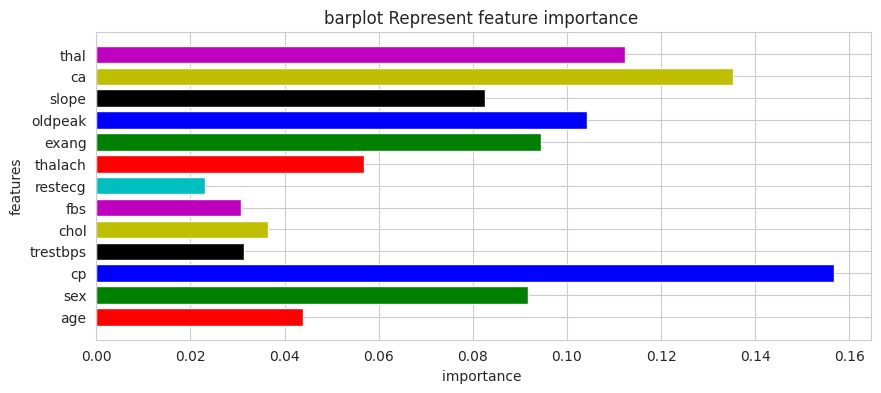

In [203]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = list('rgbkymc'))
plt.show()

# RF Feature Importance 

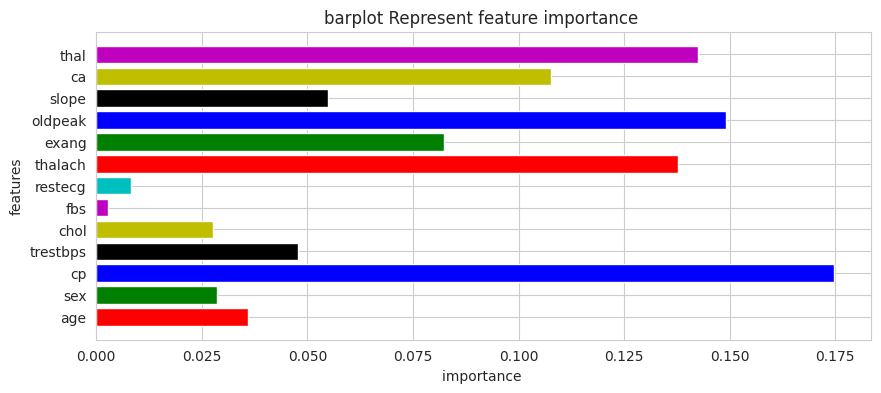

In [204]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf.feature_importances_})

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = list('rgbkymc'))
plt.show()

# DT Feature Importance 

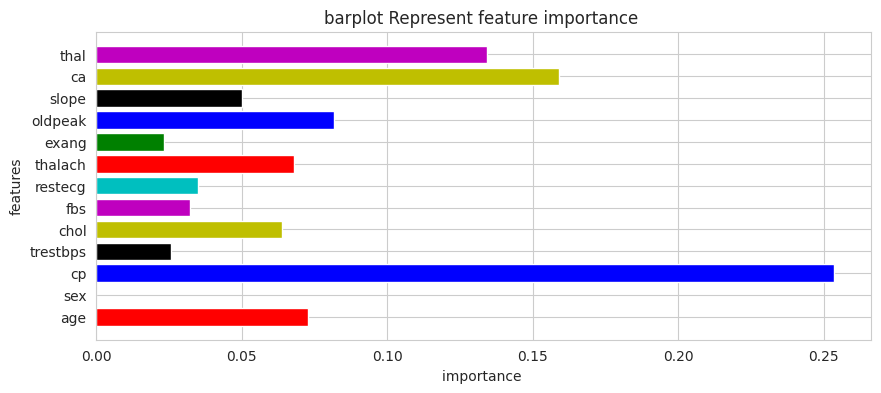

In [205]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': dt.feature_importances_})

plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = list('rgbkymc'))
plt.show()

In [206]:
import seaborn as sns

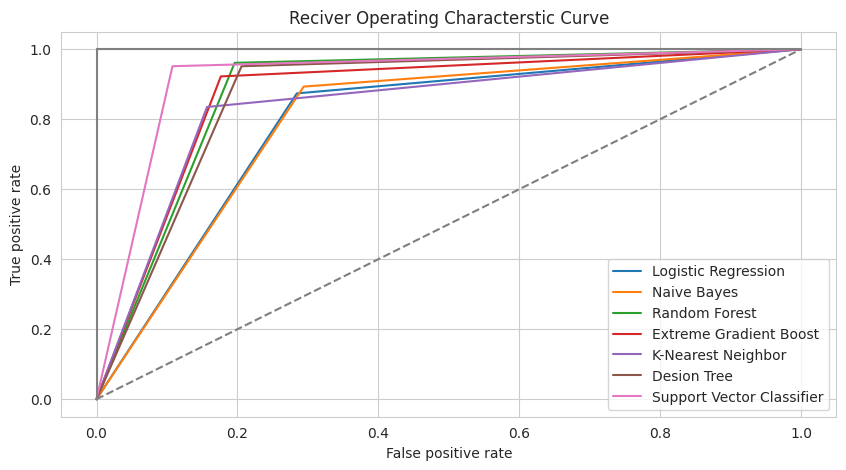

In [207]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_pred)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_pred)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_pred)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_pred)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [208]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,79.512195
1,Naive Bayes,80.000000
2,Random Forest,88.292683
3,Extreme Gradient Boost,87.317073
4,K-Nearest Neighbour,83.902439
5,Decision Tree,87.317073
6,Support Vector Machine,92.195122


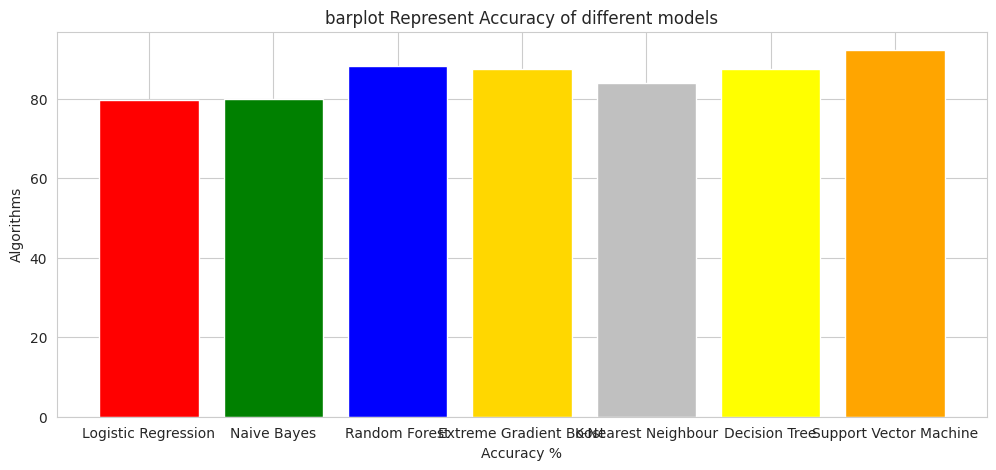

In [209]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# **Ensembling**
* **In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.**

In [210]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[91 11]
 [ 6 97]]


Accuracy of StackingCVClassifier: 91.70731707317074 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       102
           1       0.90      0.94      0.92       103

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



# **Conclusion**
1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.